MSE for SVR : 0.02658718750949873


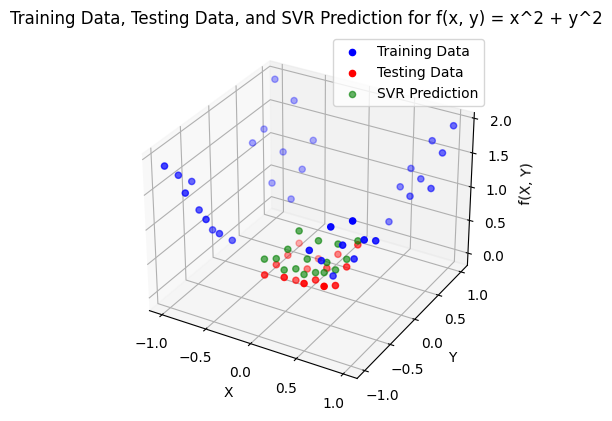

In [ ]:
#SVR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Generate training data for a 2-variable function f(x, y) = x^2 + y^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5 and -0.5 ≤ y ≤ 0.5
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)

# Adjust training data generation to exclude the specified range
X_train_2d = np.array([[a, b] for a in x for b in y if abs(a) > 0.5 and abs(b) > 0.5])

y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5 and -0.5 ≤ y ≤ 0.5) with noise
X_test_2d = np.array([[a, b] for a in x for b in y if abs(a) <= 0.5 and abs(b) <= 0.5])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:, 1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Create and fit an SVR model with hyperparameter tuning
svr_model = SVR(kernel='rbf', C=50, epsilon=0.2)
svr_model.fit(X_train_2d, y_train_2d_with_noise)

# Predict using SVR
y_pred_svr = svr_model.predict(X_test_2d)

# Calculate MSE
mse_svr = mean_squared_error(y_test_2d_with_noise, y_pred_svr)
print("MSE for SVR :", mse_svr)

# Plot the noisy training and testing data along with SVR prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, label='Training Data', color='blue')

ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, label='Testing Data', color='red')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_svr, label='SVR Prediction', color='green', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
plt.title('Training Data, Testing Data, and SVR Prediction for f(x, y) = x^2 + y^2')
plt.legend()
plt.show()


MSE for SVR: 0.016775599126542196
MSE for tuned SVR: 0.00776780683720663


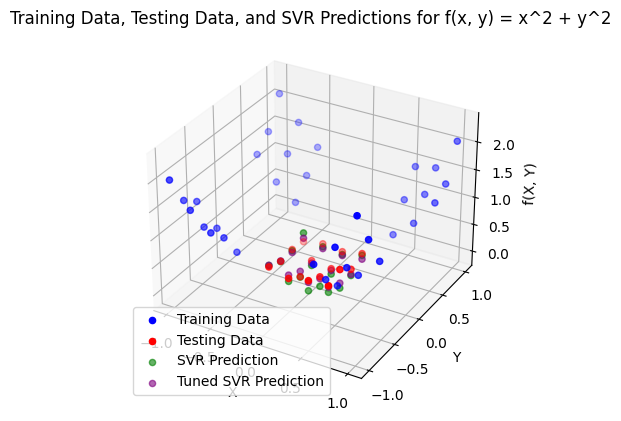

In [ ]:
# Improved SVR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Generate training data for a 2-variable function f(x, y) = x^2 + y^2 with noise, excluding the range -0.5 ≤ x ≤ 0.5 and -0.5 ≤ y ≤ 0.5
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)

# Adjust training data generation to exclude the specified range
X_train_2d = np.array([[a, b] for a in x for b in y if abs(a) > 0.5 and abs(b) > 0.5])

y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Generate test data for the same function (within the range -0.5 ≤ x ≤ 0.5 and -0.5 ≤ y ≤ 0.5) with noise
X_test_2d = np.array([[a, b] for a in x for b in y if abs(a) <= 0.5 and abs(b) <= 0.5])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:, 1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Create and fit an SVR model
svr_model = SVR(kernel='rbf', C=50, epsilon=0.2)
svr_model.fit(X_train_2d, y_train_2d_with_noise)

# Predict using SVR
y_pred_svr = svr_model.predict(X_test_2d)

# Calculate MSE
mse_svr = mean_squared_error(y_test_2d_with_noise, y_pred_svr)
print("MSE for SVR:", mse_svr)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_2d, y_train_2d_with_noise)
best_C = grid_search.best_params_['C']
best_epsilon = grid_search.best_params_['epsilon']

# Create an SVR model with the best hyperparameters
best_svr_model = SVR(kernel='rbf', C=best_C, epsilon=best_epsilon)
best_svr_model.fit(X_train_2d, y_train_2d_with_noise)

# Predict using the tuned SVR model
y_pred_svr_tuned = best_svr_model.predict(X_test_2d)

# Calculate MSE for the tuned model
mse_svr_tuned = mean_squared_error(y_test_2d_with_noise, y_pred_svr_tuned)
print("MSE for tuned SVR:", mse_svr_tuned)

# Plot the noisy training and testing data along with SVR predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, label='Training Data', color='blue')

ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, label='Testing Data', color='red')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_svr, label='SVR Prediction', color='green', alpha=0.6)
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_svr_tuned, label='Tuned SVR Prediction', color='purple', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
plt.title('Training Data, Testing Data, and SVR Predictions for f(x, y) = x^2 + y^2')
plt.legend()
plt.show()


MSE for Gaussian Process Regression: 0.03600814338100245


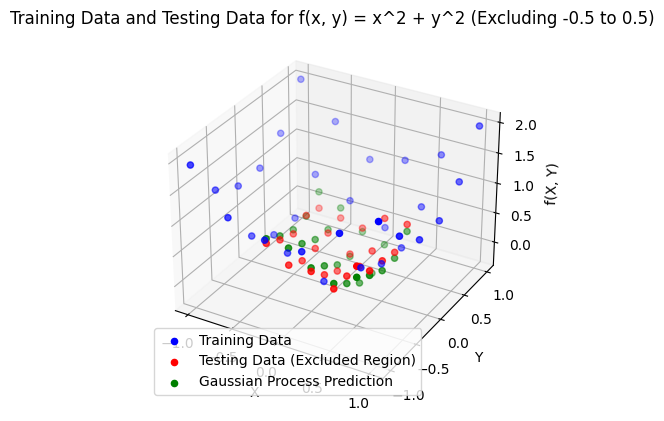

In [ ]:
#Gaussian Prediction

import numpy as np
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Define the range for generating training data, excluding -0.5 to 0.5
x_range = np.linspace(-1, 1, 6)
y_range = np.linspace(-1, 1, 6)

# Generate training data for the 2D function f(x, y) = x^2 + y^2 with noise
x = []
y = []
for x_val in x_range:
    for y_val in y_range:
        if (abs(x_val) > 0.5 or abs(y_val) > 0.5) and (x_val <= -0.5 or x_val >= 0.5 or y_val <= -0.5 or y_val >= 0.5):
            x.append(x_val)
            y.append(y_val)

X_train_2d = np.column_stack((x, y))
y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Create a Gaussian Process Regressor
gpr = gp.GaussianProcessRegressor()

# Train the GPR model
gpr.fit(X_train_2d, y_train_2d_with_noise)

# Generate test data within the excluded region
x_test = np.linspace(-0.5, 0.5, 5)
y_test = np.linspace(-0.5, 0.5, 5)
X_test_2d = np.array([(x_val, y_val) for x_val in x_test for y_val in y_test])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:, 1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Make predictions using the trained Gaussian Process Regressor
y_pred_gpr, _ = gpr.predict(X_test_2d, return_std=True)

# Calculate MSE
mse_gpr = mean_squared_error(y_test_2d_with_noise, y_pred_gpr)
print("MSE for Gaussian Process Regression:", mse_gpr)

# Plot the noisy training and testing data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, c='b', label='Training Data')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, c='r', label='Testing Data (Excluded Region)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Training Data and Testing Data for f(x, y) = x^2 + y^2 (Excluding -0.5 to 0.5)')
ax.legend()

# Plot the Gaussian Process Regressor prediction
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_gpr, c='g', label='Gaussian Process Prediction')
ax.legend()

plt.show()


MSE for Gaussian Process Regression with Matérn kernel: 0.008691481397525137


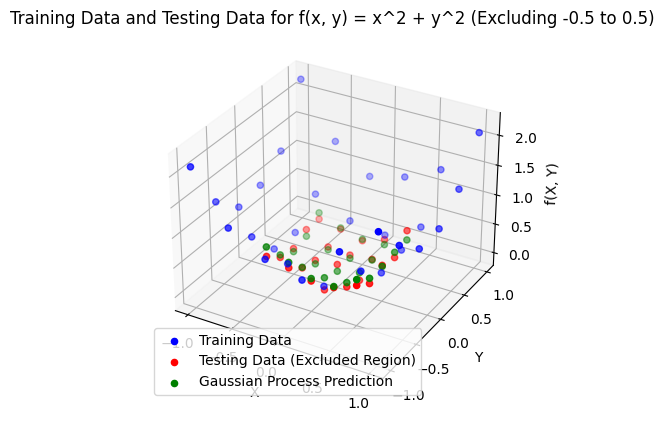

In [ ]:
# Improved Gaussian Prediction Using Matern Kernel

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Define the range for generating training data, excluding -0.5 to 0.5
x_range = np.linspace(-1, 1, 6)
y_range = np.linspace(-1, 1, 6)

# Generate training data for the 2D function f(x, y) = x^2 + y^2 with noise
x = []
y = []
for x_val in x_range:
    for y_val in y_range:
        if (abs(x_val) > 0.5 or abs(y_val) > 0.5) and (x_val <= -0.5 or x_val >= 0.5 or y_val <= -0.5 or y_val >= 0.5):
            x.append(x_val)
            y.append(y_val)

X_train_2d = np.column_stack((x, y))
y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Create a Gaussian Process Regressor with Matérn kernel
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2), nu=1.5)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the GPR model
gpr.fit(X_train_2d, y_train_2d_with_noise)

# Generate test data within the excluded region
x_test = np.linspace(-0.5, 0.5, 5)
y_test = np.linspace(-0.5, 0.5, 5)
X_test_2d = np.array([(x_val, y_val) for x_val in x_test for y_val in y_test])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:,1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Make predictions using the trained Gaussian Process Regressor
y_pred_gpr, _ = gpr.predict(X_test_2d, return_std=True)

# Calculate MSE
mse_gpr = mean_squared_error(y_test_2d_with_noise, y_pred_gpr)
print("MSE for Gaussian Process Regression with Matérn kernel:", mse_gpr)

# Plot the noisy training and testing data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, c='b', label='Training Data')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, c='r', label='Testing Data (Excluded Region)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Training Data and Testing Data for f(x, y) = x^2 + y^2 (Excluding -0.5 to 0.5)')
ax.legend()

# Plot the Gaussian Process Regressor prediction
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_gpr, c='g', label='Gaussian Process Prediction tuned')
ax.legend()

plt.show()


MSE for Neural Network: 0.011933626195949325


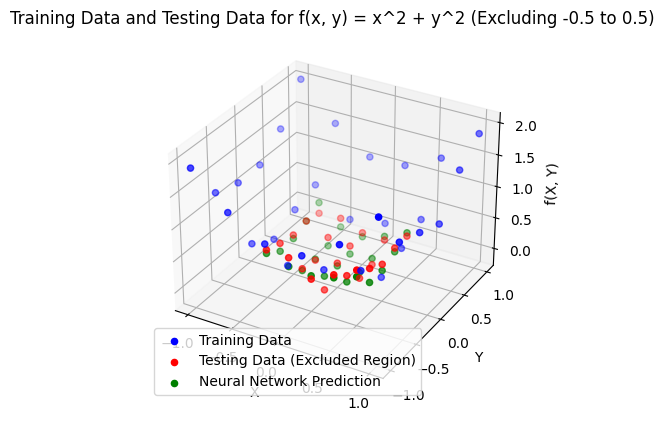

In [ ]:
#Neural network prediction

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Define the range for generating training data, excluding -0.5 to 0.5
x_range = np.linspace(-1, 1, 6)
y_range = np.linspace(-1, 1, 6)

# Generate training data for the 2D function f(x, y) = x^2 + y^2 with noise
x = []
y = []
for x_val in x_range:
    for y_val in y_range:
        if (abs(x_val) > 0.5 or abs(y_val) > 0.5) and (x_val <= -0.5 or x_val >= 0.5 or y_val <= -0.5 or y_val >= 0.5):
            x.append(x_val)
            y.append(y_val)

X_train_2d = np.column_stack((x, y))
y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Create a more complex feedforward neural network using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model with a smaller learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with noisy training data for more epochs
model.fit(X_train_2d, y_train_2d_with_noise, epochs=500, verbose=0)

# Generate test data within the excluded region
x_test = np.linspace(-0.5, 0.5, 5)
y_test = np.linspace(-0.5, 0.5, 5)
X_test_2d = np.array([(x_val, y_val) for x_val in x_test for y_val in y_test])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:, 1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Define a function for making predictions using the trained neural network
@tf.function
def predict_nn(model, test_data):
    return model(test_data)

# Make predictions using the trained neural network
y_pred_nn = predict_nn(model, X_test_2d)

# Calculate MSE
mse_nn = mean_squared_error(y_test_2d_with_noise, y_pred_nn)
print("MSE for Neural Network:", mse_nn)

# Plot the noisy training and testing data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, c='b', label='Training Data')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, c='r', label='Testing Data (Excluded Region)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Training Data and Testing Data for f(x, y) = x^2 + y^2 (Excluding -0.5 to 0.5)')
ax.legend()

# Reshape y_pred_nn to match the shape of X_test_2d
y_pred_nn = y_pred_nn.numpy().reshape(X_test_2d.shape[0])

# Plot the neural network prediction
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_nn, c='g', label='Neural Network Prediction')
ax.legend()

plt.show()


1/1 [==============================] - 0s 63ms/step
MSE for Neural Network: 0.008093623143022177


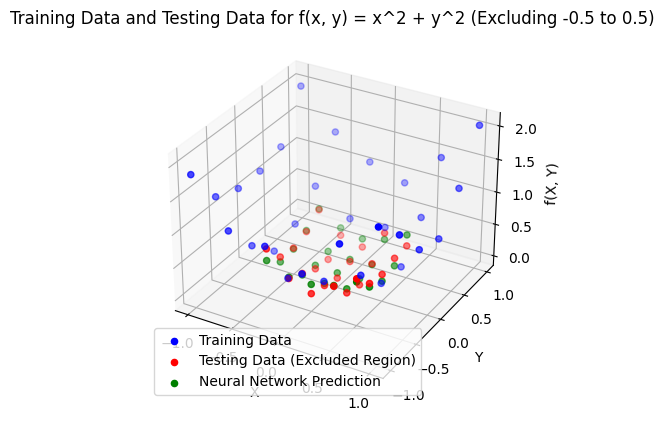

In [ ]:
#Improved Neural network using Learning rate schedule with tenserflow

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

# Define the range for generating training data, excluding -0.5 to 0.5
x_range = np.linspace(-1, 1, 6)
y_range = np.linspace(-1, 1, 6)

# Generate training data for the 2D function f(x, y) = x^2 + y^2 with noise
x = []
y = []
for x_val in x_range:
    for y_val in y_range:
        if (abs(x_val) > 0.5 or abs(y_val) > 0.5) and (x_val <= -0.5 or x_val >= 0.5 or y_val <= -0.5 or y_val >= 0.5):
            x.append(x_val)
            y.append(y_val)

X_train_2d = np.column_stack((x, y))
y_train_2d = X_train_2d[:, 0] ** 2 + X_train_2d[:, 1] ** 2

# Add noise to the training data
noise_train = 0.1 * np.random.randn(len(X_train_2d))
y_train_2d_with_noise = y_train_2d + noise_train

# Create a more complex feedforward neural network using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Implement a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Starting learning rate
    decay_steps=100,             # Number of steps before reducing the rate
    decay_rate=0.9              # Rate of decay
)

# Compile the model with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with noisy training data for more epochs
model.fit(X_train_2d, y_train_2d_with_noise, epochs=500, verbose=0)

# Generate test data within the excluded region
x_test = np.linspace(-0.5, 0.5, 5)
y_test = np.linspace(-0.5, 0.5, 5)
X_test_2d = np.array([(x_val, y_val) for x_val in x_test for y_val in y_test])
y_test_2d = X_test_2d[:, 0] ** 2 + X_test_2d[:, 1] ** 2

# Add noise to the test data
noise_test = 0.1 * np.random.randn(len(X_test_2d))
y_test_2d_with_noise = y_test_2d + noise_test

# Make predictions using the trained neural network
y_pred_nn = model.predict(X_test_2d)

# Calculate MSE
mse_nn = mean_squared_error(y_test_2d_with_noise, y_pred_nn)
print("MSE for Neural Network:", mse_nn)

# Plot the noisy training and testing data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_train_2d_with_noise, c='b', label='Training Data')
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_test_2d_with_noise, c='r', label='Testing Data (Excluded Region)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Training Data and Testing Data for f(x, y) = x^2 + y^2 (Excluding -0.5 to 0.5)')
ax.legend()

# Reshape y_pred_nn to match the shape of X_test_2d
y_pred_nn = y_pred_nn.reshape(X_test_2d.shape[0])

# Plot the neural network prediction
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], y_pred_nn, c='g', label='Neural Network Prediction Tuned')
ax.legend()

plt.show()
